In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

# Exploring the dataset

In [30]:
# Loading the dataset
df = pd.read_csv('cardio_train.csv')

In [31]:
df.shape

(69301, 13)

In [32]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [33]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69301.0,50471.480397,28563.100347,988.0,25745.0,50494.0,75150.0,99999.0
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0


In [35]:
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [36]:
# Since we don't have any format of age so we can delete entire columns.
# We will look into it later. 

In [37]:
df = df.rename(columns={'active':'ph_activity'})
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,ph_activity,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [38]:
#Similary we will change the column name of cardio and alco for better understanding of data.

In [39]:
df = df.rename(columns={'alco':'alcohal'})
df = df.rename(columns={'cardio':'outcome'})

In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohal,ph_activity,outcome
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [41]:
df['age']=df['age']/365

In [42]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohal,ph_activity,outcome
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [43]:
df['age']= df['age'].astype(int)

In [44]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohal,ph_activity,outcome
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


# EDA(Exploratory data analysis)

# Univariate Analysis

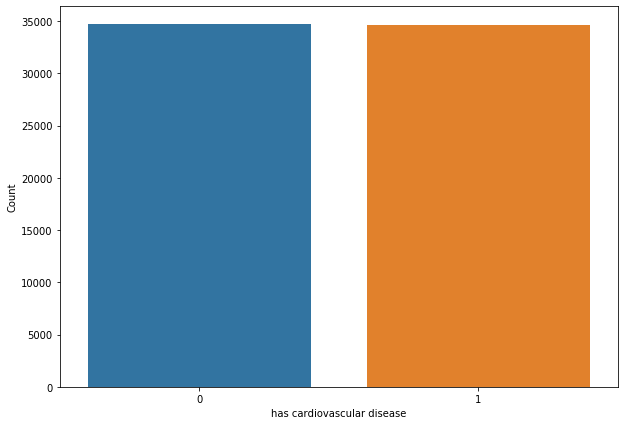

In [45]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='outcome', data=df)

# Headings
plt.xlabel('has cardiovascular disease')
plt.ylabel('Count')

plt.show()

In [46]:
df['outcome'].value_counts()

0    34679
1    34622
Name: outcome, dtype: int64

In [48]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

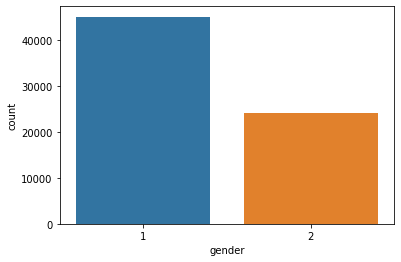

In [49]:
sns.countplot(df['gender'])

In [50]:
df['cholesterol'].value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

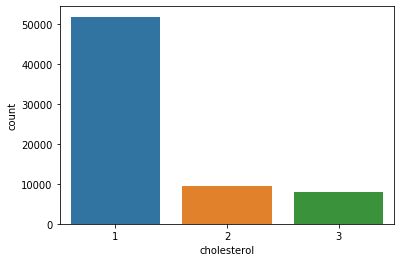

In [51]:
sns.countplot(df['cholesterol'])

In [52]:
df['gluc'].value_counts()

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

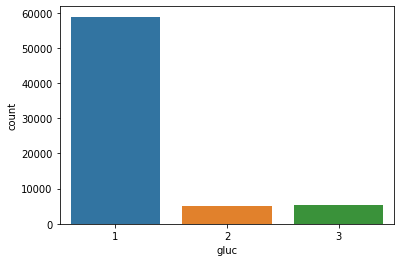

In [53]:
sns.countplot(df['gluc'])

In [54]:
df['smoke'].value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

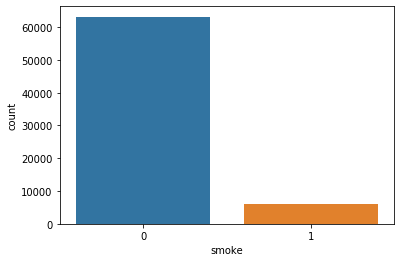

In [55]:
sns.countplot(df['smoke'])

In [56]:
df['alcohal'].value_counts()

0    65567
1     3734
Name: alcohal, dtype: int64

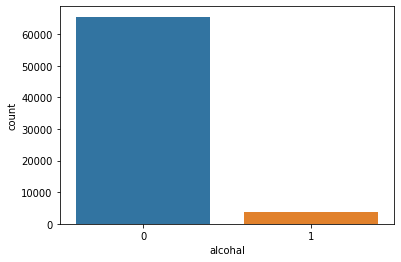

In [57]:
sns.countplot(df['alcohal'])

In [58]:
# We can see that most of the patients don't smoke and drink.

In [59]:
df['ph_activity'].value_counts()

1    55717
0    13584
Name: ph_activity, dtype: int64

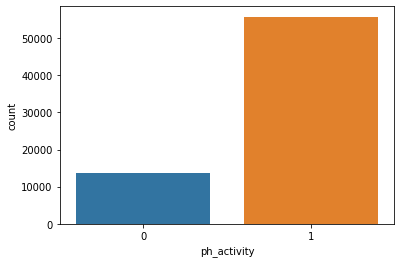

In [60]:
sns.countplot(df['ph_activity'])

In [61]:
df['ap_lo'].value_counts()

80      34513
90      14163
70      10137
100      4043
60       2705
        ...  
910         1
7099        1
1101        1
8079        1
7100        1
Name: ap_lo, Length: 157, dtype: int64

In [62]:
df['weight'].value_counts()

65.0    3826
70.0    3722
68.0    2802
75.0    2713
60.0    2678
        ... 
42.2       1
53.5       1
78.5       1
66.4       1
64.1       1
Name: weight, Length: 285, dtype: int64

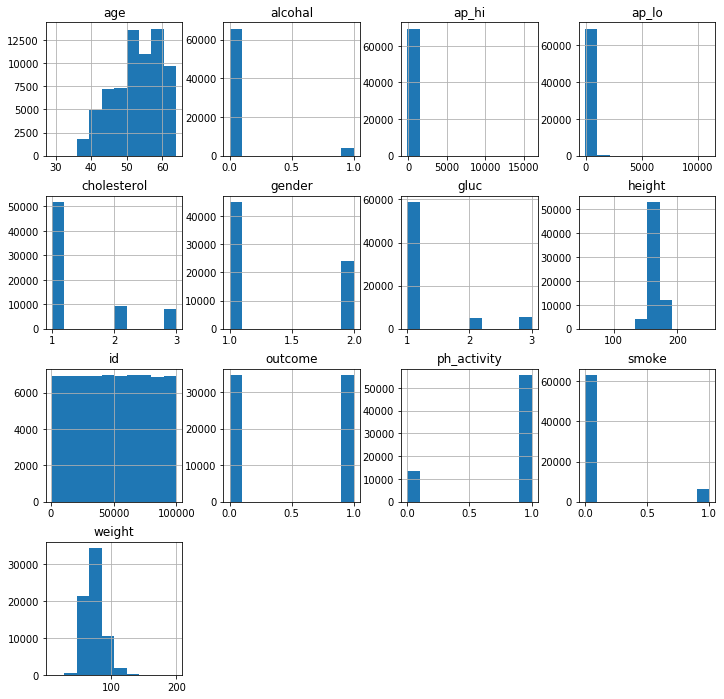

In [63]:
#histogram
df.hist(bins=10,figsize=(12,12))
plt.show()

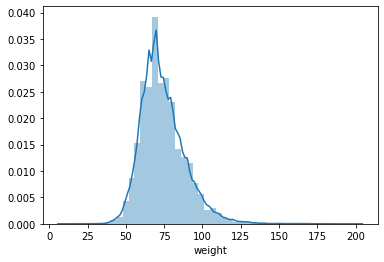

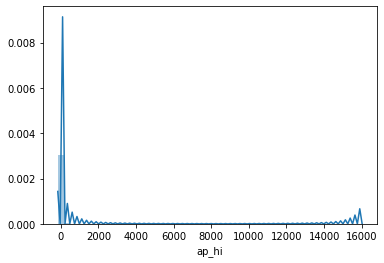

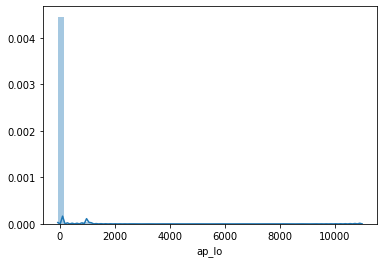

In [64]:
cols = ['weight','ap_hi','ap_lo']
for i in cols:
    plt.subplots()
    sns.distplot(df[i])

In [65]:
df=df.drop(['id'], axis=1)

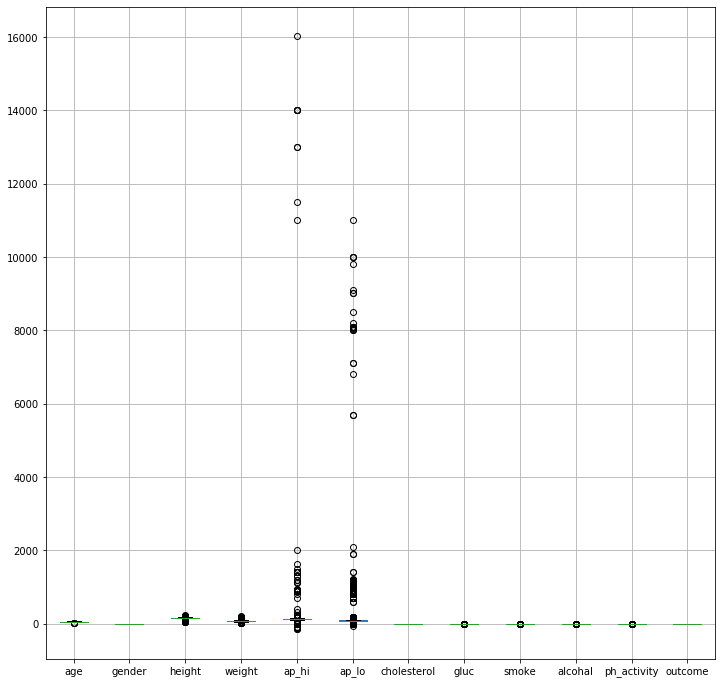

In [66]:
#box plot to see any outlier
df.boxplot(figsize=(12,12))

In [67]:
#we see a huge amount of outliers in ap_hi(ie Systolic blood pressure ) and ap_low(ie Diastolic blood pressure) columns.
# We have to look more closer into it and remove all the outliers.

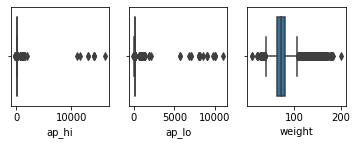

In [68]:
#each attribute outlier closer look
ax=plt.subplot(2,3,1)
sns.boxplot(x=df['ap_hi'])

ax=plt.subplot(2,3,2)
sns.boxplot(x=df['ap_lo'])

ax=plt.subplot(2,3,3)
sns.boxplot(x=df['weight'])

plt.show()

In [69]:
#It is clear tha we have huge outliers in all three column, lets work on it.

# Bivariate Analysis:

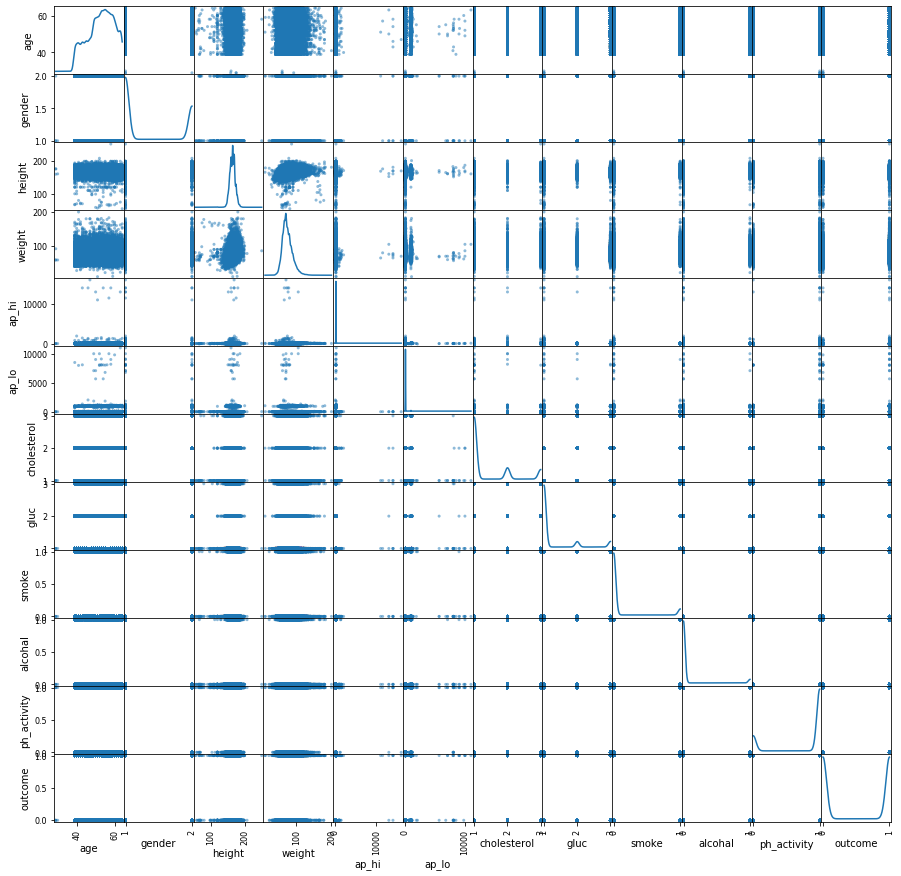

In [70]:
#scatter matrix
pd.plotting.scatter_matrix(df,figsize=(15,15),diagonal ='kde')
plt.show()

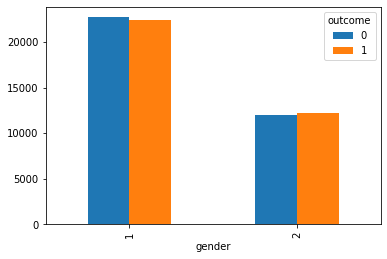

In [74]:
pd.crosstab(df['gender'],df['outcome']).plot.bar()

In [75]:
pd.crosstab(df['gender'],df['outcome'])

outcome,0,1
gender,,
1,22700,22379
2,11979,12243


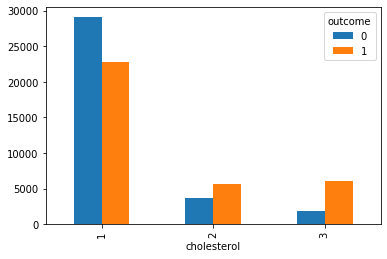

In [76]:
pd.crosstab(df['cholesterol'],df['outcome']).plot.bar()

In [77]:
pd.crosstab(df['cholesterol'],df['outcome'])

outcome,0,1
cholesterol,,
1,29043,22825
2,3755,5691
3,1881,6106


In [78]:
pd.crosstab(df['smoke'],df['outcome'])

outcome,0,1
smoke,,
0,31476,31723
1,3203,2899


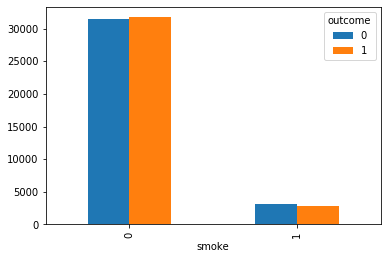

In [79]:
pd.crosstab(df['smoke'],df['outcome']).plot.bar()

In [80]:
pd.crosstab(df['alcohal'],df['outcome'])

outcome,0,1
alcohal,,
0,32754,32813
1,1925,1809


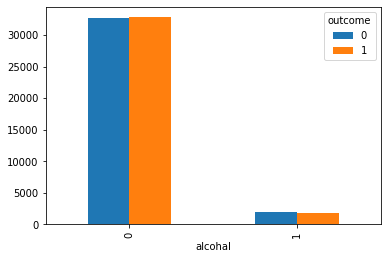

In [81]:
pd.crosstab(df['alcohal'],df['outcome']).plot.bar()

In [82]:
pd.crosstab(df['ph_activity'],df['outcome'])

outcome,0,1
ph_activity,,
0,6308,7276
1,28371,27346


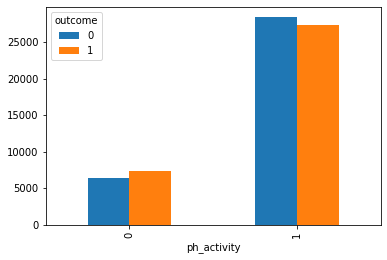

In [83]:
pd.crosstab(df['ph_activity'],df['outcome']).plot.bar()

In [84]:
# Smoking, alcohol consumption and gender does not seem to have much impact on target

# people having high glucose and high cholesterol are more prone to this disease

In [85]:
df.groupby('outcome').mean()[['age','height','weight','ap_hi','ap_lo']]

,age,height,weight,ap_hi,ap_lo
outcome,,,,,
0,51.232158,164.452522,71.586058,120.446034,84.314225
1,54.451851,164.271764,76.824305,137.226937,109.006268


In [86]:
df.groupby('outcome').max()[['age','height','weight','ap_hi','ap_lo']]

,age,height,weight,ap_hi,ap_lo
outcome,,,,,
0,64,207,178.0,14020,9800
1,64,250,200.0,16020,11000


In [91]:
# We see that the max value of ap_hi,ap_lo is way more than practical .Thus clearly indicating outliers:

In [92]:
df.groupby('outcome').min()[['age','height','weight','ap_hi','ap_lo']]

,age,height,weight,ap_hi,ap_lo
outcome,,,,,
0,29,59,22.0,-120,0
1,39,55,10.0,-150,-70


In [93]:
# We can clearly see that min value of ap_hi and ap_lo is in negative which is practically not possible

In [94]:
df.groupby('gender').mean()[['age','height','weight','ap_hi','ap_lo']]

,age,height,weight,ap_hi,ap_lo
gender,,,,,
1,52.955966,161.358659,72.561969,128.151179,94.516072
2,52.626125,169.952068,77.257163,130.092148,100.621666


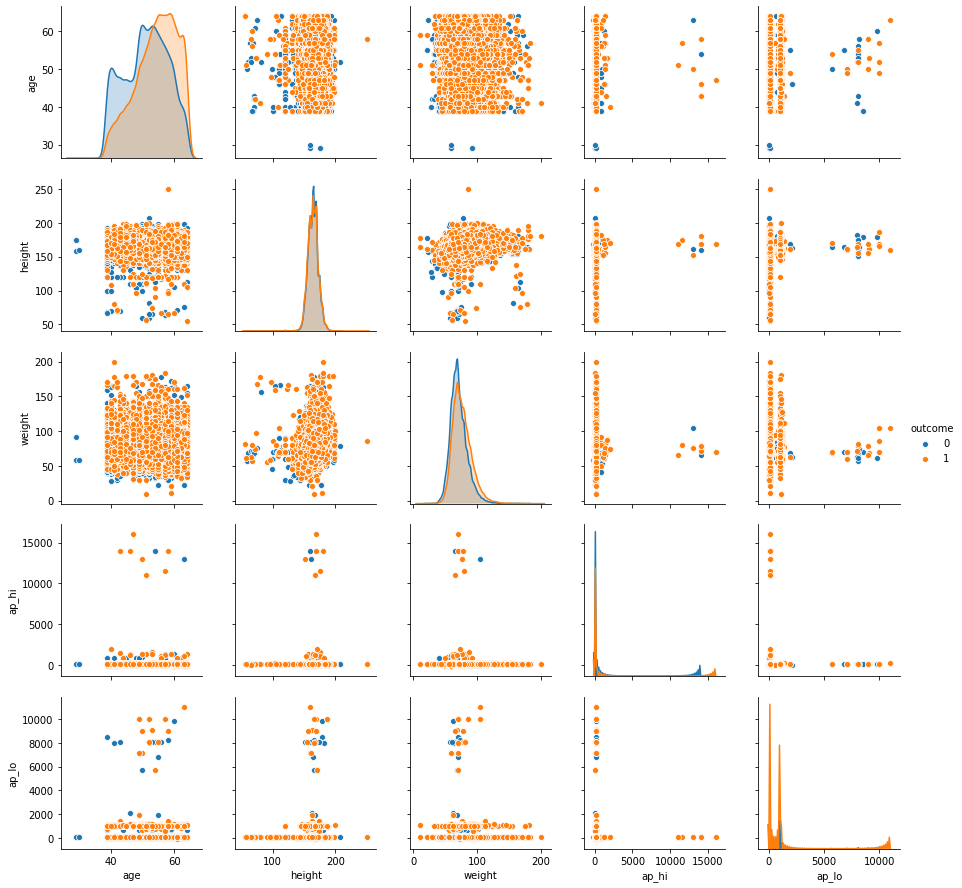

In [95]:
sns.pairplot(df,vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'],hue='outcome')

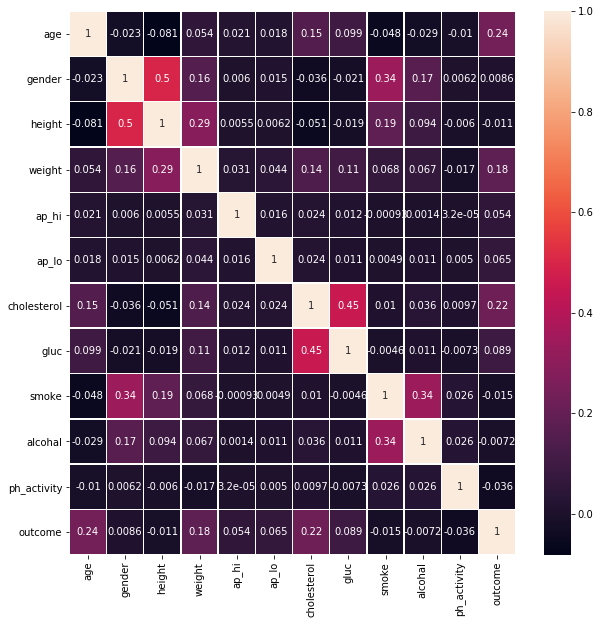

In [90]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)


In [96]:
# As expected, very low corr of target variable with gender,gluc,smoke and active

In [97]:
#let us check and remove the outliers:

In [98]:
# Z score method:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [99]:
np.where(z>3)

(array([    3,     3,    13, ..., 69296, 69297, 69298], dtype=int64),
 array([8, 9, 7, ..., 8, 3, 9], dtype=int64))

In [100]:
len(np.where(z>3)[0])

17085

In [101]:
#outlier remove process...
#IQR inter quartile range

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

age            10.0
gender          1.0
height         11.0
weight         17.0
ap_hi          20.0
ap_lo          10.0
cholesterol     1.0
gluc            0.0
smoke           0.0
alcohal         0.0
ph_activity     0.0
outcome         1.0
dtype: float64
         age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  smoke  \
0      False   False   False   False  False  False        False   True  False   
1      False   False   False   False  False  False        False  False  False   
2      False   False   False   False  False  False        False  False  False   
3      False   False   False   False  False  False        False  False   True   
4      False   False   False   False  False  False        False  False  False   
...      ...     ...     ...     ...    ...    ...          ...    ...    ...   
69296  False   False   False   False  False  False        False  False   True   
69297  False   False   False    True  False  False        False   True  False   
69298  False   F

In [102]:
#
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 35% records deleted

((69301, 12), (37666, 12))

# Model Building:

In [103]:
#Separating data into X and Y so as to do modelling:
X = df_out.drop(columns='outcome')
y = df_out['outcome']

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (30132, 11), X_test size: (7534, 11)


# Baseline Model:

In [106]:
# Without doing scaling Let us see how model behaves on our data:

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))


Accuracy score 0.7383859835412795
ROC AUC score 0.7308650994155576


In [108]:
#Support Vector Machine Classifier
from sklearn.svm import SVC

svc=SVC(kernel='linear',gamma='scale')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

Accuracy score 0.7338731085744624
ROC AUC score 0.7238084404464333


In [109]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=60)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

Accuracy score 0.6957791345898593
ROC AUC score 0.6931078776853331


In [110]:
#Let us create a function and predicting the score in one go:

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [118]:
# Lets create a function to find train accuracy, test accuracy and F score in one step:
def get_score(m,x,y,rs=45):                  #m=model name,rs= Random score:
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

In [119]:
# Lets define all the algorithms
lrc=LogisticRegression(n_jobs=-1,random_state=45)
dtc=DecisionTreeClassifier(random_state=45)
knn=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgb=XGBClassifier(n_jobs=-1,random_state=45)
ada=AdaBoostClassifier(random_state=45)

In [121]:
# Lets use non standardized data
print("LR ", get_score(lrc,X,y))
print("DT ", get_score(dtc,X,y))
print("KNN ", get_score(knn,X,y))
print("RF ", get_score(rfc,X,y))
print("GB ", get_score(gbc,X,y))
print("XGB ", get_score(xgb,X,y))
print("ADA ", get_score(ada,X,y))

LR  (0.7290877553187723, 0.7271954975045131, 0.680353365683713)
DT  (0.9710432227689476, 0.6324731867898481, 0.6046830382638493)
KNN  (0.7796736167651952, 0.6827014972921313, 0.6499531396438613)
RF  (0.9710078232857801, 0.6943824997345227, 0.6677441699376588)
GB  (0.7399907961343765, 0.7338855261760646, 0.6998083373263057)
XGB  (0.7395660023363659, 0.735796962939365, 0.7007457300938177)
ADA  (0.7324507062196892, 0.7301688435807582, 0.6777425491439442)


# Now lets us try standard scaling and check the performances:

In [122]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [123]:
print("LR ", get_score(lrc,X_sc,y))
print("DT ", get_score(dtc,X_sc,y))
print("KNN ", get_score(knn,X_sc,y))
print("RF ", get_score(rfc,X_sc,y))
print("GB ", get_score(gbc,X_sc,y))
print("XGB ", get_score(xgb,X_sc,y))
print("ADA ", get_score(ada,X_sc,y))

LR  (0.7290877553187723, 0.7271954975045131, 0.680353365683713)
DT  (0.9710432227689476, 0.6324731867898481, 0.6046830382638493)
KNN  (0.7796736167651952, 0.6827014972921313, 0.6499531396438613)
RF  (0.9710078232857801, 0.6943824997345227, 0.6677441699376588)
GB  (0.7399907961343765, 0.7338855261760646, 0.6998083373263057)
XGB  (0.7395660023363659, 0.735796962939365, 0.7007457300938177)
ADA  (0.7324507062196892, 0.7301688435807582, 0.6777425491439442)


In [124]:
#surprisingly we couldnot see any improvement in this case.
#let us start try this time Rohbust Scaling:

In [125]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
xrs=rs.fit_transform(X)

In [127]:
print("LR ", get_score(lrc,xrs,y))
print("DT ", get_score(dtc,xrs,y))
print("KNN ", get_score(knn,xrs,y))
print("RF ", get_score(rfc,xrs,y))
print("GB ", get_score(gbc,xrs,y))
print("XGB ", get_score(xgb,xrs,y))
print("ADA ", get_score(ada,xrs,y))

LR  (0.7290877553187723, 0.7271954975045131, 0.680353365683713)
DT  (0.9710432227689476, 0.6324731867898481, 0.6046830382638493)
KNN  (0.7796736167651952, 0.6827014972921313, 0.6499531396438613)
RF  (0.9710078232857801, 0.6943824997345227, 0.6677441699376588)
GB  (0.7399907961343765, 0.7338855261760646, 0.6998083373263057)
XGB  (0.7395660023363659, 0.735796962939365, 0.7007457300938177)
ADA  (0.7324507062196892, 0.7301688435807582, 0.6777425491439442)


In [128]:
#I guess we have recieved our max optimozation score using baseline model 

# let us try binning method and check:

In [129]:
# Lets apply binning to improve the distribution of data, reduce skewness and outliers
# In this, we'll only bin the data.

In [152]:
df1=df_out.copy()

In [153]:
df1.shape

(37666, 12)

In [154]:
df1.skew()

age           -0.289392
gender         0.893690
height         0.077413
weight         0.433258
ap_hi          0.796654
ap_lo          0.470555
cholesterol    2.246340
gluc           0.000000
smoke          0.000000
alcohal        0.000000
ph_activity    0.000000
outcome        0.119903
dtype: float64

In [155]:
disc,interval = pd.qcut(df1['height'],6,labels=None,retbins=True,precision=0,duplicates='drop')

In [156]:
disc

1        (160.0, 164.0]
2        (164.0, 168.0]
4        (142.0, 157.0]
5        (160.0, 164.0]
6        (160.0, 164.0]
              ...      
69291    (164.0, 168.0]
69293    (160.0, 164.0]
69294    (170.0, 186.0]
69295    (164.0, 168.0]
69300    (168.0, 170.0]
Name: height, Length: 37666, dtype: category
Categories (6, interval[float64]): [(142.0, 157.0] < (157.0, 160.0] < (160.0, 164.0] < (164.0, 168.0] < (168.0, 170.0] < (170.0, 186.0]]

In [157]:
interval

array([143., 157., 160., 164., 168., 170., 186.])

In [158]:
df1['height']=disc
df1['height']

1        (160.0, 164.0]
2        (164.0, 168.0]
4        (142.0, 157.0]
5        (160.0, 164.0]
6        (160.0, 164.0]
              ...      
69291    (164.0, 168.0]
69293    (160.0, 164.0]
69294    (170.0, 186.0]
69295    (164.0, 168.0]
69300    (168.0, 170.0]
Name: height, Length: 37666, dtype: category
Categories (6, interval[float64]): [(142.0, 157.0] < (157.0, 160.0] < (160.0, 164.0] < (164.0, 168.0] < (168.0, 170.0] < (170.0, 186.0]]

In [159]:
df1['height'].dtype

CategoricalDtype(categories=[(142.0, 157.0], (157.0, 160.0], (160.0, 164.0], (164.0, 168.0], (168.0, 170.0], (170.0, 186.0]],
              ordered=True)

In [160]:
map_dict={}
for k in range(len(df1['height'].cat.categories)):
    map_dict[df1['height'].cat.categories[k]]=k
df1['height']=df1['height'].map(map_dict)

In [161]:
df1['height']

1        2
2        3
4        0
5        2
6        2
        ..
69291    3
69293    2
69294    5
69295    3
69300    4
Name: height, Length: 37666, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [162]:
df1['weight'],interval = pd.qcut(df1['weight'],6,labels=None,retbins=True,precision=0,duplicates='drop')
map_dict={}
for k in range(len(df1['weight'].cat.categories)):
    map_dict[df1['weight'].cat.categories[k]]=k
df1['weight']=df1['weight'].map(map_dict)

In [163]:
df1['ap_hi'],interval = pd.qcut(df1['ap_hi'],6,labels=None,retbins=True,precision=0,duplicates='drop')
map_dict={}
for k in range(len(df1['ap_hi'].cat.categories)):
    map_dict[df1['ap_hi'].cat.categories[k]]=k
df1['ap_hi']=df1['ap_hi'].map(map_dict)

In [164]:
df1['ap_lo'],interval = pd.qcut(df1['ap_lo'],6,labels=None,retbins=True,precision=0,duplicates='drop')
map_dict={}
for k in range(len(df1['ap_lo'].cat.categories)):
    map_dict[df1['ap_lo'].cat.categories[k]]=k
df1['ap_lo']=df1['ap_lo'].map(map_dict)

In [165]:
df1.skew()

age           -0.289392
gender         0.893690
height         0.088656
weight         0.018365
ap_hi          0.677144
ap_lo          0.479533
cholesterol    2.246340
gluc           0.000000
smoke          0.000000
alcohal        0.000000
ph_activity    0.000000
outcome        0.119903
dtype: float64

In [166]:
#skewness has been reduced:

In [167]:
df1.dtypes

age               int32
gender            int64
height         category
weight         category
ap_hi          category
ap_lo          category
cholesterol       int64
gluc              int64
smoke             int64
alcohal           int64
ph_activity       int64
outcome           int64
dtype: object

In [168]:
#As the data becomes categorical let us make into integer:
df1['height']=df1['height'].astype('int64')
df1['weight']=df1['weight'].astype('int64')
df1['ap_hi']=df1['ap_hi'].astype('int64')
df1['ap_lo']=df1['ap_lo'].astype('int64')

In [169]:
x1=df1.drop(['outcome'],axis=1)
y1=df1['outcome']

In [170]:
print("LR ", get_score(lrc,x1,y1))
print("DT ", get_score(dtc,x1,y1))
print("KNN ", get_score(knn,x1,y1))
print("RF ", get_score(rfc,x1,y1))
print("GB ", get_score(gbc,x1,y1))
print("XGB ", get_score(xgb,x1,y1))
print("ADA ", get_score(ada,x1,y1))
print("SVC ", get_score(svc,x1,y1))

LR  (0.7290877553187723, 0.7271954975045131, 0.680353365683713)
DT  (0.9710432227689476, 0.6324731867898481, 0.6046830382638493)
KNN  (0.7796736167651952, 0.6827014972921313, 0.6499531396438613)
RF  (0.9710078232857801, 0.6943824997345227, 0.6677441699376588)
GB  (0.7399907961343765, 0.7338855261760646, 0.6998083373263057)
XGB  (0.7395660023363659, 0.735796962939365, 0.7007457300938177)
ADA  (0.7324507062196892, 0.7301688435807582, 0.6777425491439442)
SVC  (0.7302913377464689, 0.7279388340235744, 0.6685640362225096)


In [171]:
#let us make final solution using binning method itself:

In [172]:
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    f1=f1_score(y_test,pred)
    recall=f1_score(pred,y_test)
    precision=f1_score(pred,y_test)
    print(acc)
    print(conf)
    print(clas)
    
    
from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=1,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=3,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    return train_score,acc,feat_names


def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    print (acc)

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

def roc(m,x,y):
    xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)
    y_pred_pro=m.predict_proba(xte)[:,1]
    fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr,tpr)
    print(roc_auc_score(yte,y_pred_pro))
    plt.show()

# Logistic Regression

In [173]:
x1=pd.DataFrame(x1,columns=x1.columns)
x1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohal,ph_activity
1,40,1,2,3,0,0,1,1,0,0,1
2,60,1,3,2,1,1,1,1,0,0,1
4,64,1,0,1,1,1,1,1,0,0,1
5,57,1,2,0,0,0,1,1,0,0,1
6,49,1,2,3,0,0,1,1,0,0,1


In [174]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [175]:
# Lets apply backward feature elimination technique
# there are total 11 features

In [176]:
for i in range(4,11):
    t,a,locals()['f'+str(i)]=modified_bfe(lrc,x1,y1,i)
    print(i,t,a)

4 0.7286629615207618 0.7249654879473293
5 0.7282735672059188 0.7267707337793352
6 0.7292293532514426 0.7262397791228629
7 0.7294063506672802 0.7262397791228629
8 0.7294063506672802 0.7262397791228629
9 0.7294063506672802 0.7262397791228629
10 0.7294063506672802 0.7262397791228629


In [177]:
# 8 features are giving the best results
print(f8)

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke']


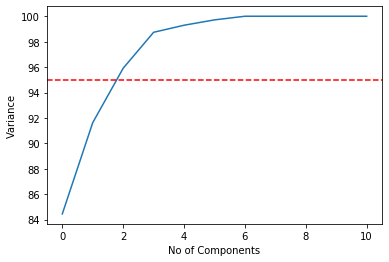

In [178]:
# lets apply PCA
nforpca(x1)

In [179]:
for i in range(7,11):
    modified_pca(lrc,x1,y1,i)

0.7259212063289795
0.7259212063289795
0.7259212063289795
0.7259212063289795


In [180]:
# BFE is performing little better

In [181]:
# Lets first apply hyper parameter tuning

In [182]:
param_grid = {'penalty':['l1','l2','elasticnet'],'C':[0.01,0.1,0.4,0.8,1]}
gridcv(lrc,param_grid,x1,y1)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.1s finished


{'C': 0.8, 'penalty': 'l2'}

In [183]:
lr = LogisticRegression(n_jobs=-1,random_state=45, C= 0.8, penalty= 'l2')
get_score(lr,x1,y1)

(0.729193953768275, 0.7259212063289795, 0.6777375452615808)

# Random Forest Classifier

In [186]:
# First lets use feature importance
get_score(rfc,x1,y1)

(0.8460122482211759, 0.691727726452161, 0.6560834024404691)

In [187]:
param_grid={'n_estimators':[50,70,100,150,200],'criterion':['gini','entropy'],
           'max_depth':[4,5,6,8,9,10],'max_features':['auto','sqrt','log2']}
randomcv(rfc,param_grid,x1,y1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


{'n_estimators': 200,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [189]:
rf=RandomForestClassifier(n_jobs=-1,random_state=45,n_estimators= 200,
 max_features= 'auto',
 max_depth= 10,
 criterion= 'entropy')
get_score(rf,x1,y1)


(0.7590711175616836, 0.7311245619624084, 0.6867887184562098)

In [190]:
#over fitting has reduced:

In [192]:
feat=pd.Series(rf.feature_importances_,index=x1.columns)
feat.sort_values()

gluc           0.000000
smoke          0.000000
alcohal        0.000000
ph_activity    0.000000
gender         0.012081
height         0.044335
weight         0.056325
cholesterol    0.089873
ap_lo          0.175456
age            0.184133
ap_hi          0.437797
dtype: float64

In [193]:
column=[]
for i in x1.columns:
    if feat[i]>=0.02:
        column.append(i)

In [194]:
x2=x1.loc[:,column]
x2.shape

(37666, 6)

In [195]:
get_score(rf,x2,y1)

(0.7585401253141704, 0.7302750345120527, 0.6860321384425216)

In [201]:
param_grid={'n_estimators':[70,100,150,200,300],'criterion':['gini','entropy'],
           'max_depth':[6,8,10,12,14],'max_features':['auto','sqrt','log2']}
randomcv(rfc,param_grid,x2,y1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'entropy'}

In [202]:
rf1=RandomForestClassifier(n_jobs=-1,random_state=45,n_estimators= 100,
 max_features= 'sqrt',
 max_depth= 8,
 criterion= 'gini')
get_score(rf1,x2,y1)

(0.7441679351481468, 0.730593607305936, 0.6820403559343275)

In [203]:
# Lets try to boost it
adarf=AdaBoostClassifier(base_estimator=rf1, learning_rate=0.001, n_estimators=50, random_state=45)
get_score(adarf,x2,y1)

(0.7449467237778329, 0.7303812254433472, 0.6834559281885052)

In [204]:
adarf=AdaBoostClassifier(base_estimator=rf1, learning_rate=0.1, n_estimators=50, random_state=45)
get_score(adarf,x2,y1)

(0.7558851640766044, 0.7321864712753531, 0.6909313725490197)

In [205]:
# Lets cross validate
print(cross(adarf,x2,y1,3))

(0.7330482946290436, 0.0021745318856369496)


In [211]:
# Lets get evaluation metrics
get_metrics(adarf,x2,y1)

0.7320802803440586
[[4078 1611]
 [ 912 2816]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.76      5689
           1       0.64      0.76      0.69      3728

    accuracy                           0.73      9417
   macro avg       0.73      0.74      0.73      9417
weighted avg       0.75      0.73      0.73      9417



0.7891400827405884


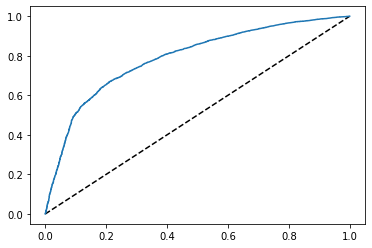

In [213]:
from sklearn.metrics import roc_curve, roc_auc_score
roc(adarf,x2,y1)


# Saving the Model

In [208]:
import joblib
joblib.dump(adarf,'model_adarf.pkl')

['model_adarf.pkl']